<a href="https://colab.research.google.com/github/NoVA0123/stock-price-prediction/blob/main/Share%20Price%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
data = yf.download('ADANIPOWER.NS')
data.to_csv('ap.csv')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dataframe = pd.read_csv('ap.csv')
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-08-20,108.000000,110.000000,98.300003,100.099998,100.099998,164328256
1,2009-08-21,99.900002,103.900002,98.000000,103.150002,103.150002,33717840
2,2009-08-24,103.900002,104.400002,101.550003,103.099998,103.099998,13665282
3,2009-08-25,102.500000,103.150002,101.000000,102.750000,102.750000,11720267
4,2009-08-26,103.000000,107.500000,102.849998,105.099998,105.099998,17158838


In [ ]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%Y-%m-%d')
df = dataframe.loc[dataframe['Date'] >= '15-05-2014']

<ipython-input-55-3fc12a17d814>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = dataframe.loc[dataframe['Date'] >= '15-05-2014']


In [ ]:
df.dropna(inplace = True)
df.head()

<ipython-input-56-e742b29e66da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,Date,Open,High,Low,Close,Adj Close,Volume
1168,2014-05-15,54.950001,56.750000,53.500000,54.950001,54.950001,41551615
1169,2014-05-16,59.000000,59.299999,55.099998,55.599998,55.599998,52054519
1170,2014-05-19,55.950001,60.200001,55.599998,59.900002,59.900002,35629255
1171,2014-05-20,60.849998,61.900002,59.000000,60.150002,60.150002,23327676
1172,2014-05-21,60.700001,62.750000,59.549999,62.250000,62.250000,23569881


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
data = pd.DataFrame()
data = df.drop(['Date', 'Close'], axis = 1)

In [ ]:
data.head()

,Open,High,Low,Adj Close,Volume
1168,54.950001,56.750000,53.500000,54.950001,41551615
1169,59.000000,59.299999,55.099998,55.599998,52054519
1170,55.950001,60.200001,55.599998,59.900002,35629255
1171,60.849998,61.900002,59.000000,60.150002,23327676
1172,60.700001,62.750000,59.549999,62.250000,23569881


In [ ]:
X = data.drop('Adj Close', axis = 1).to_numpy()
y = data['Adj Close'].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_pred, y_train, y_pred = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 100,
                            random_state = 3,
                            max_samples = 0.5,
                            max_features = 0.75,
                            max_depth = 15)

In [ ]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [ ]:
predictions = rfr.predict(x_pred)

In [ ]:
print('r2 score: ', r2_score(y_pred, predictions))
print('MAE: ', mean_absolute_error(y_pred, predictions))

r2 score:  0.9979923951414891
MAE:  1.410838010179893


In [ ]:
values = np.array([2439.000000, 2440.850098, 2421.649902, 6346812]).reshape(1,4)
rfr.predict(values)

array([494.1660141])

In [ ]:
import matplotlib.pyplot as plt

training_data_len = len(df) - len(predictions)
train = df[:training_data_len]
test = df[training_data_len:]
test['Predictions'] = predictions

<ipython-input-66-1b56a1f73dbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


In [ ]:
test.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
3518,2023-11-23,388.299988,390.500000,380.049988,381.700012,381.700012,2759240,157.404500
3519,2023-11-24,382.700012,400.799988,380.299988,397.200012,397.200012,9134805,63.829000
3520,2023-11-28,407.000000,464.399994,407.000000,446.200012,446.200012,67482614,99.655625
3521,2023-11-29,456.700012,470.799988,426.799988,433.100006,433.100006,44215572,97.665501
3522,2023-11-30,433.000000,436.600006,417.100006,431.500000,431.500000,11540019,347.764998
3523,2023-12-01,437.000000,454.799988,435.350006,440.399994,440.399994,13761200,29.821158
3524,2023-12-04,494.000000,494.000000,458.500000,464.700012,464.700012,15084875,58.741500
3525,2023-12-05,463.000000,545.799988,456.000000,538.150024,538.150024,59296372,29.738555
3526,2023-12-06,545.000000,589.450012,539.000000,560.450012,560.450012,46431996,33.421400
3527,2023-12-07,567.950012,574.700012,552.349976,562.400024,562.400024,15993745,49.312416


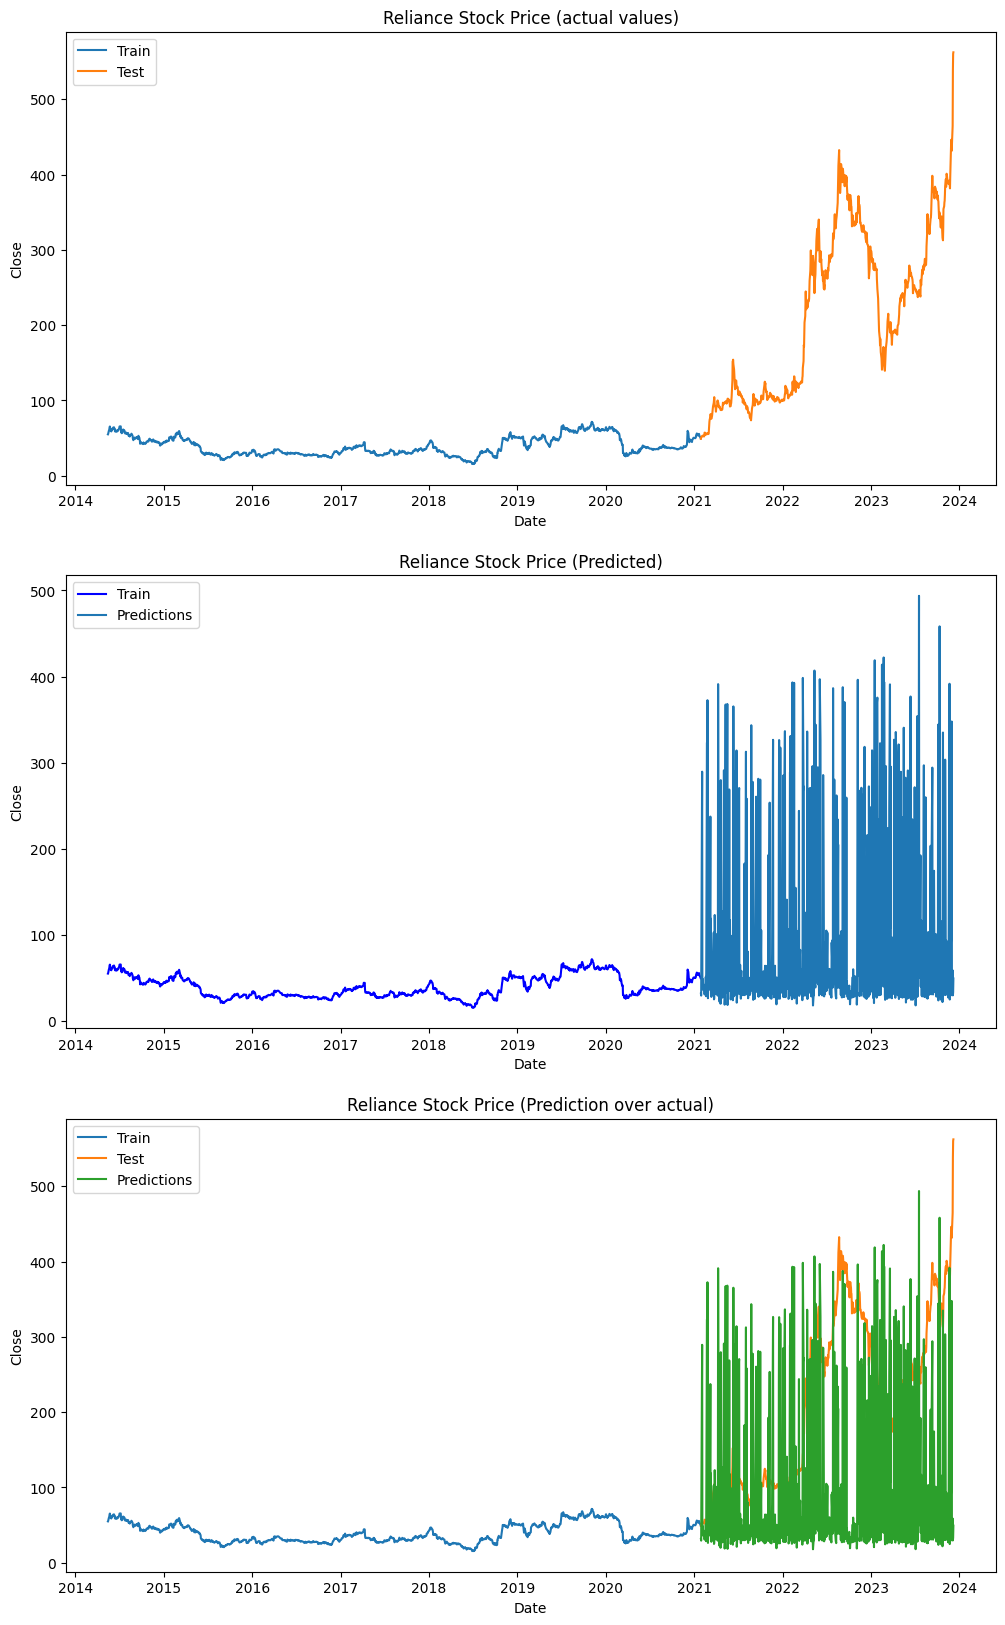

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 20))

axs[0].plot(train['Date'], train['Adj Close'])
axs[0].plot(test['Date'], test[['Adj Close']])
axs[0].set_title('Reliance Stock Price (actual values)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel("Close")
axs[0].legend(['Train', 'Test'])

axs[1].plot(train['Date'], train['Adj Close'], color = 'b')
axs[1].plot(test['Date'], test[['Predictions']])
axs[1].set_title('Reliance Stock Price (Predicted)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel("Close")
axs[1].legend(['Train','Predictions'])

axs[2].plot(train['Date'], train['Adj Close'])
axs[2].plot(test['Date'], test[['Adj Close', 'Predictions']])
axs[2].set_title('Reliance Stock Price (Prediction over actual)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel("Close")
axs[2].legend(['Train', 'Test', 'Predictions'])